In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
import seaborn as sns


In [2]:
# 기본 : DataFrame 형태로 반환
# 반환값 : Bunch 객체로 dict와 유사
dataDict = load_diabetes(as_frame = True,scaled=False)
dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
dataDict['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
# # 기본 : DataFrame 형태로 반환
# # 반환값 : tuple로 data와 target만 반환
# dataDict = load_diabetes(return_X_y=True)
# dataDict.keys()

In [5]:
# # 기본 : DataFrame 형태로 반환
# # 반환값 : tuple로 data와 target만 반환
# dataDict = load_diabetes(return_X_y=True,as_frame=True)
# dataDict.keys()

In [6]:
dataDF = dataDict['data']
targetSR = dataDict['target']

In [7]:
dataDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [8]:
targetSR

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

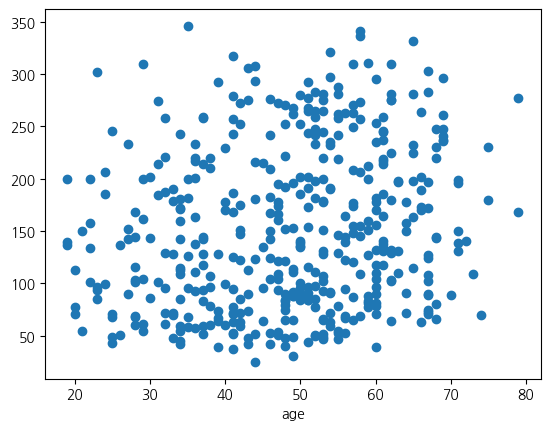

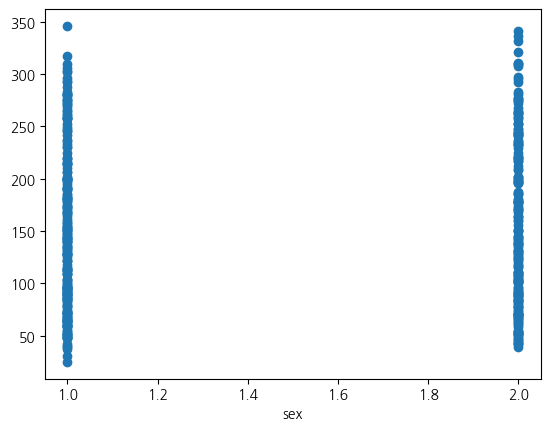

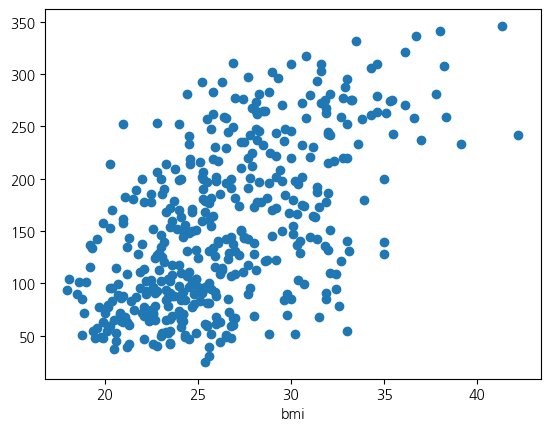

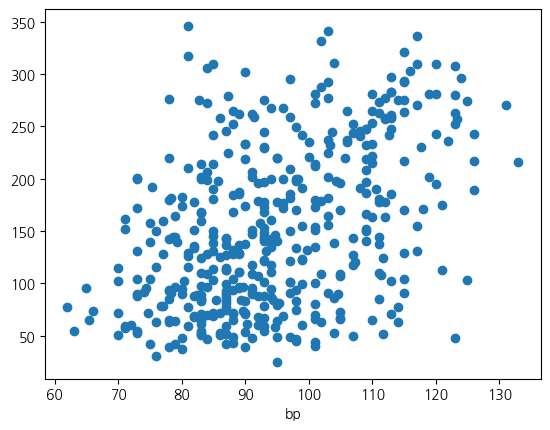

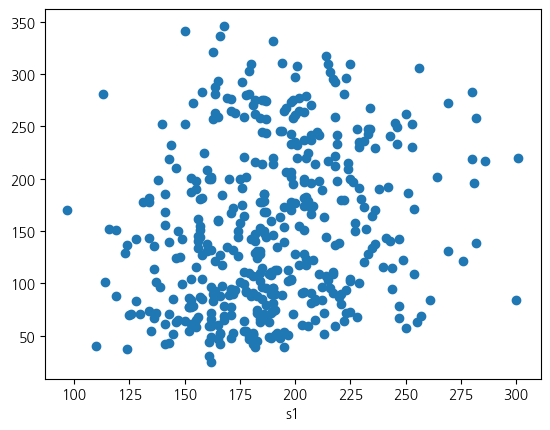

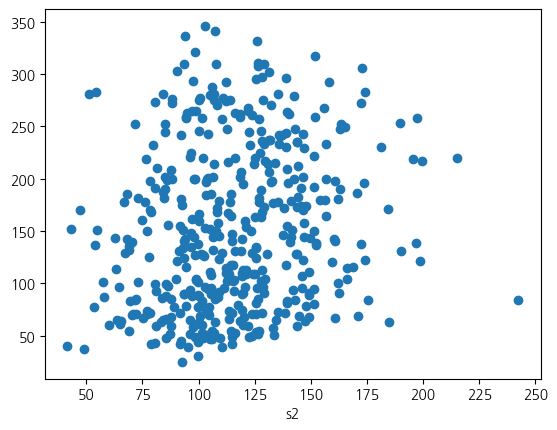

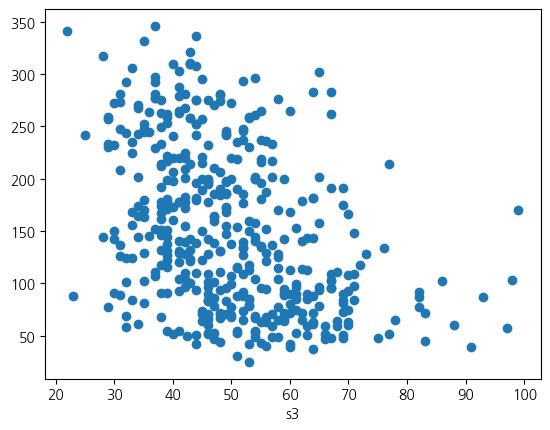

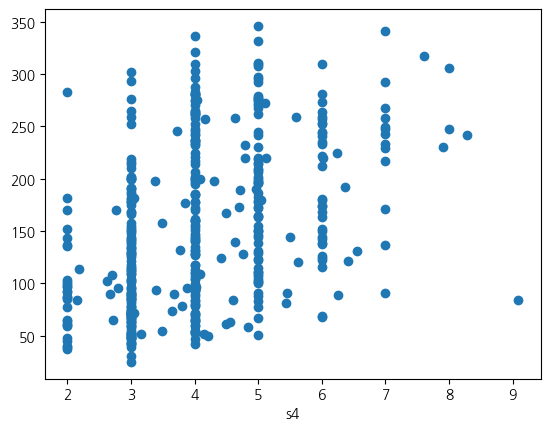

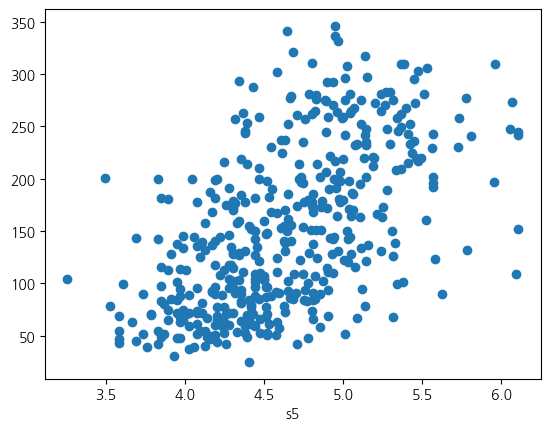

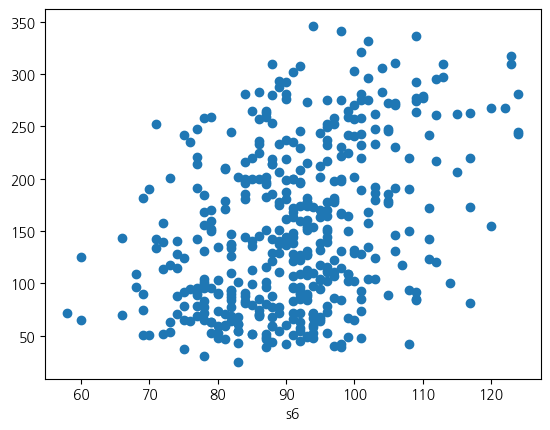

In [9]:
for i in dataDict['feature_names']:
    plt.scatter(dataDF[i],targetSR)
    plt.xlabel(i)
    plt.show()

In [10]:
dataDF_final = pd.concat([dataDF, targetSR], axis=1)


In [11]:
dataDF_final.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


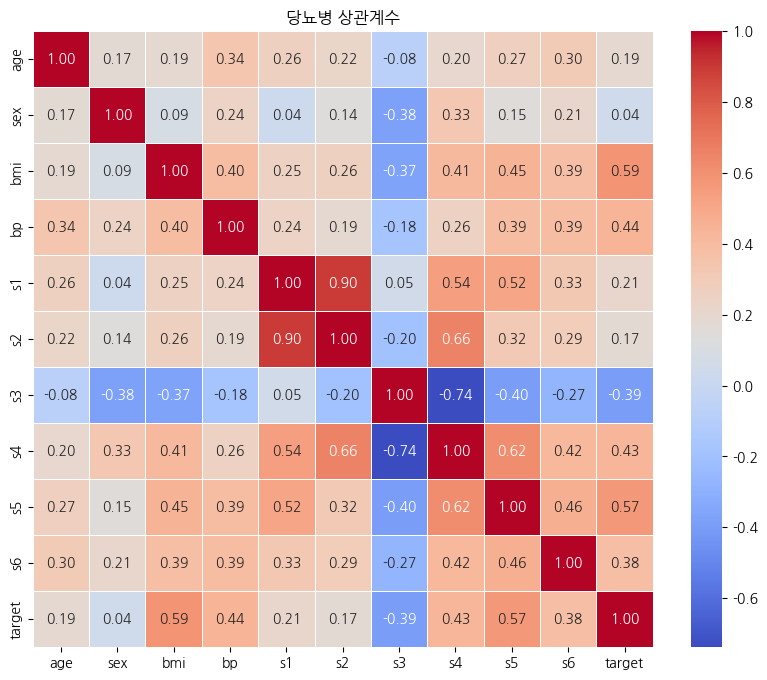

In [12]:
correlation_matrix = dataDF_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('당뇨병 상관계수')
plt.show()

##### 전처리 작업

['bmi','bp','s3','s4,'s5'] 하려고 했는데 s4가 s3와 s5와 상관계수가 높은거 같아 뺌 

In [13]:
DF = dataDF[['bmi','bp','s3','s5']]

In [14]:
targetSR

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [15]:
DF.shape,DF.ndim

((442, 4), 2)

In [16]:
targetSR.shape,targetSR.ndim

((442,), 1)

In [17]:
# 트레인용,테스트용 분리
X_train,X_test,y_train,y_test = train_test_split(DF,
                                                 targetSR,
                                                 test_size=0.2,
                                                 random_state=42)

In [18]:
print(X_train.shape,X_train.ndim,y_train.shape,y_train.ndim)
print(X_test.shape,X_test.ndim,y_test.shape,y_test.ndim)

(353, 4) 2 (353,) 1
(89, 4) 2 (89,) 1


In [19]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

X_test = X_test.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [20]:
Scaler = MinMaxScaler()

In [21]:
Scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [24]:
model.n_features_in_,model.n_samples_fit_,model.effective_metric_,model.effective_metric_params_

(4, 353, 'euclidean', {})

In [25]:
model.score(X_test_scaled,y_test)

0.31421418716666993

In [26]:
scores = {}
for k in range(1,model.n_samples_fit_+1):

    model.n_neighbors = k

    score = model.score(X_test_scaled,y_test)
    
    scores[k] = score

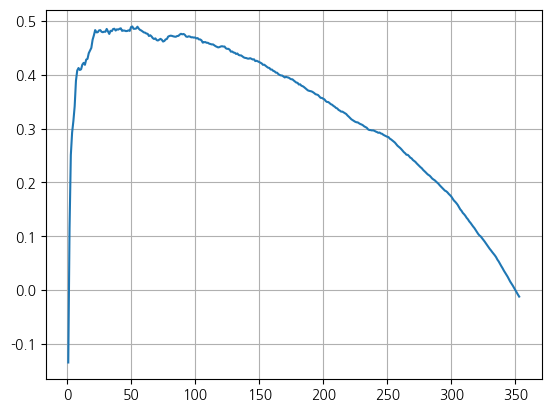

In [27]:
plt.plot(list(scores.keys()),list(scores.values()))
plt.grid()
plt.show()

In [28]:
best_k = sorted(scores.items(),key=lambda x:x[1],reverse=True)[0][0]
best_k

51

In [29]:
model.n_neighbors = best_k

In [30]:
model.score(X_test_scaled,y_test)

0.48965238401224986

In [31]:
pred = model.predict(X_test_scaled)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, pred)
print(f'Mean Absolute Error: {mae}')

r2 = r2_score(y_test, pred)
print(f'R² Score: {r2}')


Mean Squared Error: 2703.899113996777
Mean Absolute Error: 41.6157743996475
R² Score: 0.48965238401224986


In [33]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})


print(df_results.head(20))

    Actual   Predicted
0    219.0  155.509804
1     70.0  164.137255
2    202.0  179.862745
3    230.0  229.686275
4    111.0  126.549020
5     84.0   99.509804
6    242.0  228.137255
7    272.0  209.156863
8     94.0  110.549020
9     96.0  123.705882
10    94.0   96.039216
11   252.0  149.921569
12    99.0   91.294118
13   297.0  196.980392
14   135.0  102.019608
15    67.0  119.196078
16   295.0  214.039216
17   264.0  237.294118
18   170.0  174.274510
19   275.0  228.588235
